## Preparación del entorno

In [ ]:
import numpy as np

import sklearn

import pandas as pd

Si el entorno está correctamente instalado, las líneas de código anteriores deben importar los paquetes sin ningún error.

Nota: para el resto de las preguntas y soluciones de código, puede ingresar más celdas si lo considera necesario.


## Carga y estudio de datos

Cargue los datos desde el archivo *adult_data.csv*. Para esto puede utilizar la librería *pandas* con su función *read_csv*.

In [ ]:
# Genero un dataframe a partir del .csv.
df = pd.read_csv('./adult_data.csv')
df

Imprima los nombres de las columnas (atributos), e investigue la documentación para entender que significa cada uno de ellos.

In [ ]:
nameList = list(df.columns.values)
print 'Atributos: ' + ', '.join(str(name) for name in nameList) 

Al investigar el significado de cada atributo, se le dió especial atención a descifrar el de los siguientes atributos (cuyo significado no resultaba obvio a simple vista):
<ul>
    <li>fnlwgt - Se refiere al peso (proporción de la población sensada) que tiene una entrada particular con respecto a la población utilizada en el censo, de acuerdo a quien haya realizado el mismo.</li>
    <li>education-num - Se refiere al nivel más alto de educación obtenido por la persona, pero representado en forma numérica.</li>
    <li>capital_gain - Ganancias registradas asociadas a inversiones.</li>
    <li>capital_loss - Pérdidas de capital asociadas a inversiones.</li>
</ul>

**PREGUNTA: A continuación realice algunas conjeturas de cuáles pueden llegar a ser los atributos de mayor utilidad para predecir el nivel de ingresos (income) de una persona.**

<p>**RESPUESTA:**</p>
<p>Los atributos que a un nivel intuitivo podrían llegar a ser de mayor utilidad, son:</p>
<ul>
    <li><i>education </i>- Asumiendo que en general, una mejor/mayor educación genera individuos más capaces de desempeñarse en áreas de alta remuneración.</li>
    <li><i>education-num </i>- Igual al atributo anterior.</li>
    <li><i>marital-status </i>- Asumiendo que una persona soltera tendrá más horas disponibles para dedicarle a su área de desempeño.</li>
    <li><i>occupation </i>- Por ejemplo se puede suponer que una persona que se dedica a la elaboración de artesanías debería tener un ingreso menor al de una persona especializada en algún área como profesional.</li>
    <li><i>relationship </i>- Mismo razonamiento que con el atributo marital-status.</li>
    <li><i>race </i>- Si bien ocurre menos a medida que pasa el tiempo, se puede suponer que va a haber una cierta diferencia entre los ingresos de personas de raza blanca y el resto por motivos de discriminación.</li>
    <li><i>sex </i>- Similar al atributo anterior.</li>
    <li><i>native-country </i>- Similar al atributo anterior.</li>
</ul>

## Extracción de atributos

Separar la columna **income** en un array **y** que será utilizada como atributo clase:

In [ ]:
y = np.array(df['income'])

Eliminar la columna **fnlwgt** ya que no aporta a la solución del problema. También eliminar la columna **education-num** ya que duplica la información de la columna 'education'. Por último, eliminar la columna **income** ya que es la columna que contiene la clase que se pretende predecir:

In [ ]:
del df['fnlwgt']
del df['education-num']
del df['income']
# Se imprime dataframe para verificar borrado.
df

Los atributos cuyos valores son categorías ('workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'), deben de transformarse a valores numéricos para poder ser utilizados como entradas en los modelos de scikit-learn.

**PREGUNTA: Por qué no es apropiado transformar un atributo de categoría en simples índices numéricos?**

**RESPUESTA: Porque se generaría una relación de órden y magnitud que el algoritmo de aprendizaje puede tomar y no es real...**

Utilice las clases *LabelEncoder* y *OneHotEncoder* del paquete *preprocessing* de *sklearn* para transformar los atributos de categorías en atributos numéricos. Guarde los datos de entrada en una matriz **X**.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
# Inicializo matriz X.
X = []
df_copy = df.copy()
for attributeName in df_copy:
    # Si una columna no toma valores numericos.
    if (df_copy[attributeName].dtype != "int64"):
        # Se la transforma a valores numericos.
        df_copy[attributeName] = le.fit_transform(df_copy[attributeName])

# Obtengo el dataframe con valores numericos como una matriz de enteros.
df_values = df_copy.values
# tomo en cuenta solo los atributos que son categorías
enc = OneHotEncoder(categorical_features=[1,2,3,4,5,6,7,11])
X = enc.fit_transform(df_copy.values).toarray()
#print X.shape
# Codigo para ver donde se encuentra age ahora en los nuevos atributos.
# df['age']
# print 'age is between ' + str(enc.feature_indices_[0]) + ' and ' + str(enc.feature_indices_[1])
# agebla = df['age']
# distinctages = []
# for i in agebla:
#     if (not (i in distinctages)):
#         distinctages.append(i)
# print len(distinctages)
# print distinctages
# print df['age'].max()
# print df['age'].min()


**PREGUNTA: Cuántos y cuáles son los nuevos atributos del dataset?**

**RESPUESTA:** Los atributos ahora van del índice 0 al 102, los nuevos (categorías) van desde el indice 0 hasta el 98, tomando un valor binario (0 o 1):

    -'workclass' de 0 a 7.

    -'education' de 8 a 23.

    -'marital-status' de 24 a 30.

    -'occupation' de 31 a 45.

    -'relationship' de 46 a 51.

    -'race' de 52 a 56.

    -'sex' de 57 a 58.

    -'native-country' de 59 a 98.

Finalmente siguen los atributos que no son categorías, del índice 99 al 102:

    -'age' (99), 'capital-gain' (100), 'capital-loss' (101) y 'hours-per-week' (102).


In [ ]:
print enc.feature_indices_
#print enc.active_features_

## Partición de datos

Para poder entrenar y testear un algoritmo de aprendizaje, es necesario primero particionar los datos en dos conjuntos disjuntos de entrenamiento y testeo. Separe aleatoriamente un 25% de los datos para testeo, llame a los atributos de entrada como **X_test** y al vector de salida esperado **y_test**. El 75% restante se utilizará para el entrenamiento, nombre a la matriz con los datos de entrada como **X_train** y al vector de salida correspondiente como **y_train**.
Para esto puede utilizar la función *train_test_split* del paquete *cross_validation* de *sklearn*:

In [ ]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#print X_train
#print y_train

Examine el tamaño de las matrices y vectores generados:

In [ ]:
print X_train.shape
print X_test.shape
print y_train.size
print y_test.size

## Entrenamiento

Ahora que tenemos particionados los datos en entrenamiento y testeo, podemos comenzar a entrenar los algoritmos.

Genere un modelo 'dt' entrenando un algoritmo de árboles de decisión (ver el paquete *tree* de *sklearn*) con el vector de entrada X_train y el vector de salida y_train. Utilice los valores por defecto:

In [ ]:
 from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

# se prueba modelo
#print X_test[0]
out_dt = dt.predict(X_test)
#print'---------------------'
#print y_test
diff = 0
#for x in range(len(y_test)):
#    if y_test[x] != out[x]:
#        diff += 1
#print 'Se equivocó en un ' + str(float(diff)/len(y_test) * 100) + '%.'
print("Cantidad de errores sobre un total de %d : %d" % (X_test.shape[0],(y_test != out_dt).sum()))

Genere un modelo 'nb' entrenando un algoritmo de Naive Bayes (ver el paquete *naive_bayes* de *sklearn*) con el vector de entrada X_train y el vector de salida y_train. Utilice los valores por defecto:

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
out_nb = nb.fit(X_train, y_train).predict(X_test)
print("Cantidad de errores sobre un total de %d : %d" % (X_test.shape[0],(y_test != out_nb).sum()))

Genere un modelo 'svc' entrenando un algoritmo de Support Vector Machines (ver el paquete *svm* de *sklearn*) con el vector de entrada X_train y el vector de salida y_train. Utilice los valores por defecto:

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
out_svc = svc.predict(X_test)
#print(svc.predict(X_test))
print("Cantidad de errores sobre un total de %d : %d" % (X_test.shape[0],(y_test != out_svc).sum()))

## Testing

Luego de tener los modelos entrenados, podemos medir qué tan bien funcionan los modelos (su capacidad de predicción) utlizando medidas standard como accuracy, precision, recall y medida-f.

**PREGUNTA: De la definición de cada una de las medidas de perfomance (accuracy, precision, recall y medida-f)**

**RESPUESTA:**
    -accuracy:  Es la proximidad de los resultados de la medición realizada y el valor verdadero.
    
    -precision: Es la repetibilidad, o reproducibilidad de la medición realizada. En reconocimiento de patrones y la recuperación de información con clasificación binaria, la precisión (también llamado valor predictivo positivo) es la fracción de casos recuperados que son relevantes.
    
    -recall:    Es el cociente TP / (TP + FN), donde TP es el número de verdaderos positivos y FN el número de falsos negativos. Intuitivamente es la capacidad del clasificador para encontrar todas las muestras positivas. Siendo 1 el mejor valor y 0 el peor.
    
    -medida-f:  Se puede interpretar como un promedio ponderado entre precision y recall, alcanzando su mejor valor en 1 y su peor en 0.

Implemente una función 'imprimir_performance' que dado un vector de entrada 'X', un vector de salida 'y', y un clasificador 'clf':
- Realice la predicción para el vector de entrada X.
- Imprima la medida de accuracy.
- Imprima precision, recall y medida f de cada clase.
- Imprima la matriz de confusión.

Para esto puede utilizar el paquete *metrics* de *sklearn*.

In [7]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

def imprimir_performance(X, y, clf):
    out = clf.predict(X)
    print 'accuracy: ' + str(accuracy_score(y, out))
    p, r, f, s = precision_recall_fscore_support(y, out)
    print 'precision: ' + str(p)
    print 'recall: ' + str(r)
    print 'medida-f: ' + str(f)
    print 'confusion matrix:' 
    print confusion_matrix(y, out)


Utilice la función **imprimir_performance** para imprimir las medidas de performance para el clasificador **dt** basado en árboles de decisión:

In [ ]:
imprimir_performance(X_test, y_test, dt)

Utilice la función **imprimir_performance** para imprimir las medidas de performance para el clasificador **nb** basado en Naive Bayes:

In [ ]:
imprimir_performance(X_test, y_test, nb)

Utilice la función **imprimir_performance** para imprimir las medidas de performance para el clasificador **svc** basado en Support Vector Machines:

In [ ]:
imprimir_performance(X_test, y_test, svc)

**PREGUNTA: Realice un breve análisis de los resultados obtenidos.**

**RESPUESTA:**

## Validación cruzada

Entrene y mida la perfomance de los calsifificadores anteriores, pero ahora utilizando el algoritmo de validación cruzada (cross validation) tomando 5 particiones. Imprima el promedio de accuracy obtenido para cada modelo:

**PREGUNTA: Describa brevemente cuáles son las ventajas de utilizar validación cruzada en vez de realizar una único esquema de partición como se hizo al principio.**

**RESPUESTA:**

## Mejorando los resultados

Existen varias técnicas que pueden ser utilizadas para mejorar los resultados de nuestros modelos. A continuación utilizaremos técnias de **selección de atributos** y de **ajuste de hiperparámetros**.

## Selección de atributos

En nuestros entrenamientos hemos utilizado todos los atributos disponibles para entrenar nuestros modelos. Pero no siempre esto lleva a los mejores resultados, de hecho muchas veces, trabajar con un conjunto reducido de atributos devuelve mejores resultados.

**PREGUNTA: Investigue de qué se trata la técnica de selección de atributos (feature selection) y argumente brevemente por qué puede mejorar la performance de un algoritmo de aprendizaje automático.**

**RESPUESTA:**

Utilizando el paquete *feature_selection* de *sklearn*, seleccione e imprima la lista de los 20 mejores atributos según la medida estadística chi^2:

Intente obtener la lista de los mejores N atributos, donde N sea la cantidad mínima posible de atributos que mantenga o mejore las medidas de performance obtenidas con validación cruzada:

Con el conjunto de atributos obtenido, entrene los clasificadores nuevamente y verifique que las medidas de precision, recall mejoran en general:

## Ajuste de hiperparámetros

Por lo general, cada algoritmo y modelo de aprendizaje automático posee parámetros configurables. Estos parámetros se los suele denominar 'hiperparámetros' del algoritmo, ya que son parámetros que el algoritmo no ajusta automáticamente, sino que son ajustados por el "usuario".

La correcta selección de estos hiperparámetros por lo general tiene una gran incidencia en la performance de los algoritmos.

**PREGUNTA: Para los modelos generados anteriormente (Árbol de decisión, Naive Bayes y Support Vector Machines), investigue en la documentación de scikit-learn cuáles son sus hiperparámetros y qué valores toman. A continuación liste y de una breve descripción de cada uno:**

**RESPUESTA:**


Pruebe diferentes configuraciones de hiperparámetros para los modelos anteriores de modo de mejorar los resultados de performance obtenidos mediante la función *imprimir_performance*.

Para esto puede realizarlo manualmente o buscar una estrategia más avanzada utilizando la clase *GridSearchCV* del paquete *grid_search* de *sklearn*. Esta clase permite definir una grilla de parámetros y posibles valores para luego entrenar el modelo con todas sus posibles combinaciones y devolver la configuración que retorna la mejor performance.

En caso de tener que combinar varios procesos de extracción y selección de atributos junto con un modelo de aprendizaje, se recomienda utilizar la clase *Pipeline* del paquete *pipeline* de *sklearn*.

Tener en cuenta que si la grilla es muy grande, el proceso puede requerir mucho tiempo de cómputo y memoria.

**PREGUNTAS:**
- **Cuáles son los valores de los hiperparámetros con los cuales se obtienen los mejores resultados de performance?**
- **Con qué modelo se obtienen los mejores resultados de precision y recall?**

**RESPUESTA:**

**PREGUNTA: Escriba las conclusiones generales que haya obtenido de la tarea.**

**RESPUESTA:**

# Clasificación de Imágenes

En esta sección trabajaremos con clasificación de imágenes. Cada instancia a clasificar es una imagen con un dígito escrito a mano. El objetivo es detectar el dígito correspondiente a cada imagen. Para eso utilizaremos un dataset de *sklearn.datasets* que contiene imágenes de dígitos escritos a mano etiquetadas. Cada imagen se representa como un vector de pixeles.

Utilizar la función *load_digits* para importar los datos de dígitos escritos a mano. Inspeccionar su contenido (data, target, images y target_names), renderizar el dígito de la primera instancia del dataset:

0


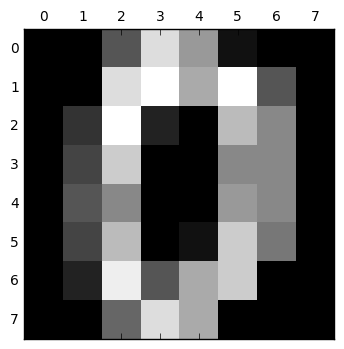

In [2]:
>>> from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
digits = load_digits()
plt.gray() 
plt.matshow(digits.images[0])
print digits.target[0]
plt.show() 

Particionar los datos en dos conjuntos dijuntos de entrenamiento y testeo:

In [3]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

print X_train
print y_train

[[  0.   0.   2. ...,   0.   0.   0.]
 [  0.   5.  16. ...,   6.   1.   0.]
 [  0.   0.   4. ...,   2.   0.   0.]
 ..., 
 [  0.   0.   9. ...,  16.   2.   0.]
 [  0.   0.   1. ...,   0.   0.   0.]
 [  0.   0.   1. ...,   1.   0.   0.]]
[5 2 0 ..., 2 7 1]


c:\program files (x86)\python\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Extraer atributos de las imágenes para ser utilizados en el modelo de clasificación. Para esto, investigar las clases de Principal Component Analysis (PCA) del paquete sklearn.decomposition:

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(digits.data)
print(pca.explained_variance_ratio_) 
train=pca.transform(X_train)
test=pca.transform(X_test)

[ 0.14890594  0.13618771  0.11794594  0.08409979  0.05782414  0.0491691
  0.04315985  0.03661364  0.03353236  0.03078776]


**PREGUNTA: Explique el método de extracción de atributos y justifique su elección.**

**RESPUESTA:**

Elija dos algoritmos de aprendizaje y entrene e intente obtener los mejores modelos de clasificación posibles:

In [30]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='identity', hidden_layer_sizes=8, learning_rate_init=.01)
mlp.fit(train, y_train)
print mlp.predict(test[1])
print y_test[1]
print mlp.score(test, y_test)
imprimir_performance(test, y_test, mlp)

[9]
9
0.926666666667
accuracy: 0.926666666667
precision: [ 0.93333333  0.86842105  0.86046512  0.93617021  0.98113208  0.93103448
  0.97727273  0.975       0.85294118  0.91666667]
recall: [ 0.97674419  0.89189189  0.97368421  0.95652174  0.94545455  0.91525424
  0.95555556  0.95121951  0.76315789  0.91666667]
medida-f: [ 0.95454545  0.88        0.91358025  0.94623656  0.96296296  0.92307692
  0.96629213  0.96296296  0.80555556  0.91666667]
confusion matrix:
[[42  0  0  0  0  0  0  1  0  0]
 [ 0 33  3  0  0  0  0  0  0  1]
 [ 0  1 37  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  0  1  0]
 [ 0  2  0  0 52  0  1  0  0  0]
 [ 0  0  1  0  0 54  0  0  2  2]
 [ 0  0  0  0  0  1 43  0  1  0]
 [ 1  0  0  0  0  0  0 39  0  1]
 [ 2  1  2  2  1  1  0  0 29  0]
 [ 0  1  0  1  0  1  0  0  1 44]]


c:\program files (x86)\python\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Imprima los mejores resultados de precision, recall y accuracy para los algoritmos seleccionados:

In [31]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
svc = svm.SVC(gamma=0.001)
svc.fit(train, y_train)
print svc.predict(test[1])
print y_test[1]
print svc.score(test, y_test)
imprimir_performance(test, y_test, svc)


[9]
9
0.991111111111
accuracy: 0.991111111111
precision: [ 1.          1.          1.          1.          1.          0.96721311
  1.          0.97619048  0.97368421  1.        ]
recall: [ 1.          1.          1.          0.97826087  1.          1.          1.
  1.          0.97368421  0.95833333]
medida-f: [ 1.          1.          1.          0.98901099  1.          0.98333333
  1.          0.98795181  0.97368421  0.9787234 ]
confusion matrix:
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  1  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  0  0  0  0  1  0  0 37  0]
 [ 0  0  0  0  0  1  0  1  0 46]]


c:\program files (x86)\python\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


**PREGUNTA: Analice los resultados obtenidos.**

**RESPUESTA:**